# This is a starter notebook to review and explore datasets.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [138]:
# df_bat_stats = pd.read_csv("./batting_stats_ipl.csv")
# df_bat_stats.head(5)

# the first column seems to be the index for the file, so we choose it as index column
df_bat_stats = pd.read_csv("./batting_stats_ipl.csv", index_col=0)
df_bat_stats.head()

,Batter,Batter Team(s),No. of Innings,Not Outs,Total Runs,Balls Faced,No. of Outs,Batting Average,Strike Rate,Balls Faced per Innings,Balls Faced per Wicket
0,A Ashish Reddy,Sunrisers Hyderabad/Deccan Chargers,22,8,266,181,14,19.000000,146.961326,8.227273,12.928571
1,A Badoni,Lucknow Super Giants,22,4,340,268,18,18.888889,126.865672,12.181818,14.888889
2,A Chandila,Rajasthan Royals,2,2,4,7,0,4.000000,57.142857,3.500000,inf
3,A Chopra,Kolkata Knight Riders,6,0,53,71,6,8.833333,74.647887,11.833333,11.833333
4,A Choudhary,Royal Challengers Bangalore,3,2,25,20,1,25.000000,125.000000,6.666667,20.000000


#### check if any other columns need fixed or renamed  

In [4]:
df_bat_stats.columns

Index(['Batter', 'Batter Team(s)', 'No. of Innings', 'Not Outs', 'Total Runs',
       'Balls Faced', 'No. of Outs', 'Batting Average', 'Strike Rate',
       'Balls Faced per Innings', 'Balls Faced per Wicket'],
      dtype='object')

In [5]:
# renaming columns

df_bat_stats.rename(columns={'Batter': 'batter', 'Batter Team(s)': 'teams_played_with', 'No. of Innings': 'innings_played', 'Not Outs': 'not_outs',
        'Total Runs': 'total_runs', 'Balls Faced': 'balls_faced', 'No. of Outs': 'times_got_out', 'Batting Average': 'batting_average', 'Strike Rate': 'strike_rate',
        'Balls Faced per Innings': 'balls_per_innings', 'Balls Faced per Wicket': 'balls_per_wicket'}, inplace=True)
df_bat_stats.columns

Index(['batter', 'teams_played_with', 'innings_played', 'not_outs',
       'total_runs', 'balls_faced', 'times_got_out', 'batting_average',
       'strike_rate', 'balls_per_innings', 'balls_per_wicket'],
      dtype='object')

#### check for null values

In [6]:
df_bat_stats.isna().sum()

batter               0
teams_played_with    0
innings_played       0
not_outs             0
total_runs           0
balls_faced          0
times_got_out        0
batting_average      0
strike_rate          0
balls_per_innings    0
balls_per_wicket     0
dtype: int64

#### Some plotting

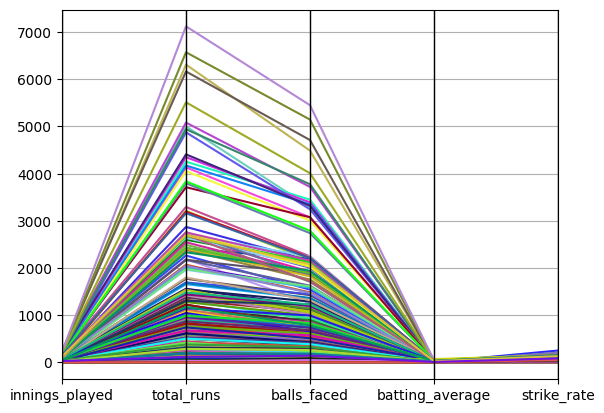

In [7]:
# visualize players using parallel coordinates plot

ax = pd.plotting.parallel_coordinates(frame=df_bat_stats, class_column='batter', cols=[
    'innings_played', 'total_runs', 'balls_faced', 'batting_average', 'strike_rate'])
ax.get_legend().remove()
plt.show()

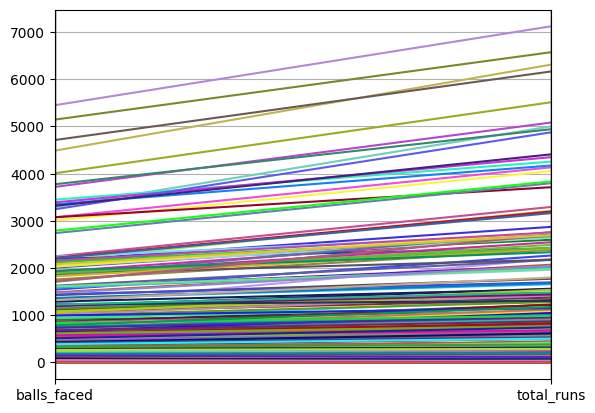

In [8]:
ax = pd.plotting.parallel_coordinates(
    frame=df_bat_stats, class_column='batter', cols=['balls_faced', 'total_runs'])
ax.get_legend().remove()
plt.show()

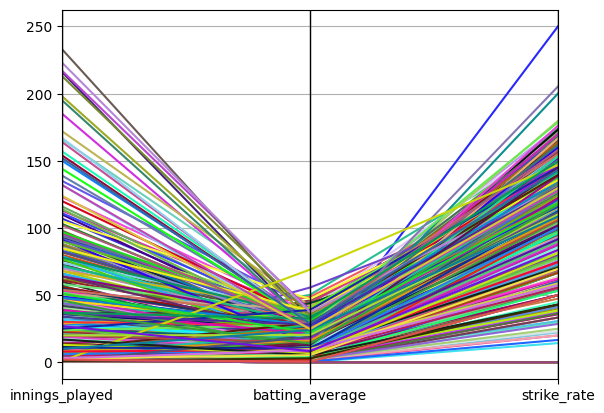

In [9]:
ax = pd.plotting.parallel_coordinates(frame=df_bat_stats, class_column='batter', cols=[
    'innings_played', 'batting_average', 'strike_rate'])
ax.get_legend().remove()
plt.show()

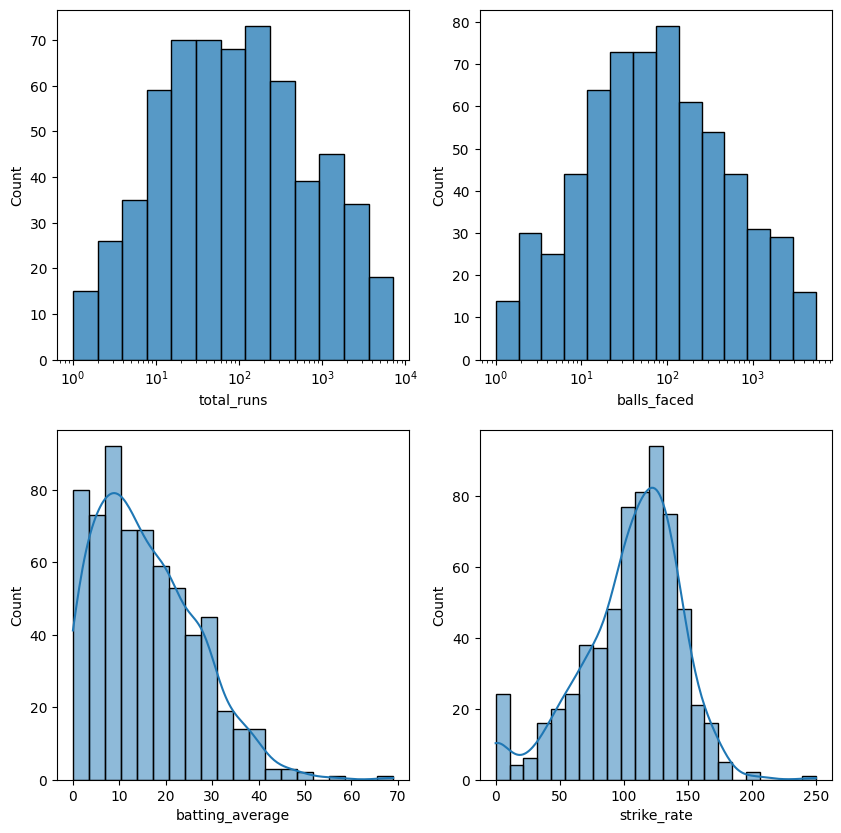

In [10]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

# plt.yscale('log')
sns.histplot(data=df_bat_stats, x='total_runs', ax=axes[0,0], log_scale=True)
sns.histplot(data=df_bat_stats, x='balls_faced', ax=axes[0,1], log_scale=True)
sns.histplot(data=df_bat_stats, x='batting_average', ax=axes[1,0], kde=True)
sns.histplot(data=df_bat_stats, x='strike_rate', ax=axes[1,1], kde=True)
plt.show()

In [11]:
# Create box plots
fig = go.Figure()

fig.add_trace(
    go.Box(x=df_bat_stats['strike_rate'], name='Strike Rate', boxpoints='outliers'))
fig.add_trace(go.Box(
    x=df_bat_stats['batting_average'], name='Batting Average', boxpoints='outliers'))

# Customize layout
fig.update_layout(
    title="Batting Average and Strike Rate comparison",
    yaxis_title="Values",
    showlegend=True,
    height=500,
    width=1500,
)

# Show the plot
fig.show()

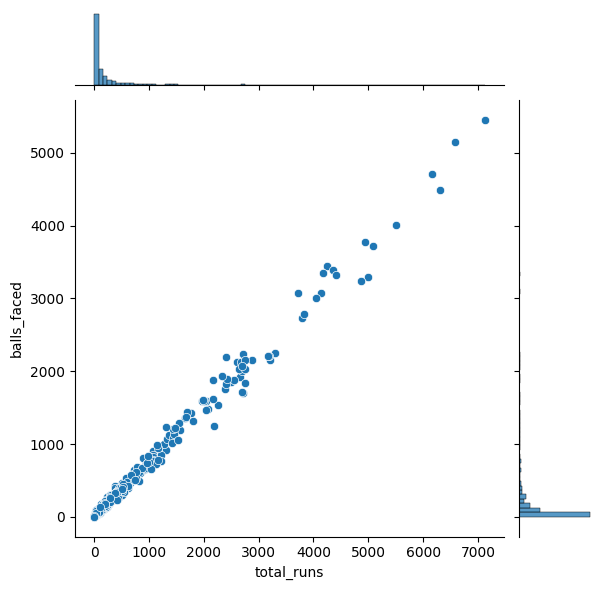

In [12]:
sns.jointplot(data=df_bat_stats, x='total_runs', y='balls_faced', kind='scatter')
plt.show()

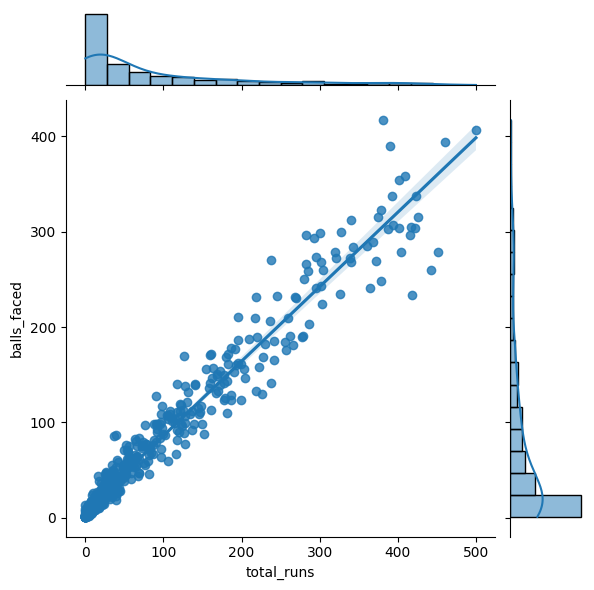

In [13]:
x_max = 500
sns.jointplot(data=df_bat_stats[(df_bat_stats['total_runs'] <= x_max) & (
    df_bat_stats['balls_faced'] <= x_max)], x='total_runs', y='balls_faced', kind='reg')
plt.show()

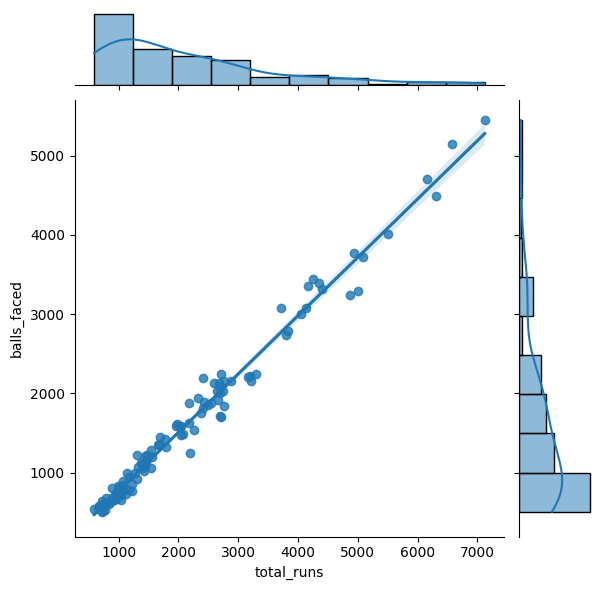

In [14]:
x_min = 500
sns.jointplot(data=df_bat_stats[(df_bat_stats['total_runs'] >= x_min) & (
    df_bat_stats['balls_faced'] >= x_min)], x='total_runs', y='balls_faced', kind='reg')
plt.show()

In [95]:
def create_spider_chart(categories, values_set1, values_set2=[0], title="Spider Chart"):
    fig = go.Figure()

    fig.add_trace(
        go.Scatterpolar(
            r=values_set1 + values_set1[:1],
            theta=categories + categories[:1],
            fill="toself",
            line=dict(color="blue"),
            marker=dict(color="blue"),
            hoverinfo="text",  # Enable hover text
            text=values_set1,  # Text to be displayed on hover
            opacity=0.5,
        )
    )

    if values_set2 != [0]:
        fig.add_trace(
            go.Scatterpolar(
                r=values_set2 + values_set2[:1],
                theta=categories + categories[:1],
                fill="toself",
                line=dict(color="red"),
                marker=dict(color="red"),
                hoverinfo="text",  # Enable hover text
                text=values_set2,  # Text to be displayed on hover
                opacity=0.5,
            )
        )

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=False, range=[0, max(max(values_set1), max(values_set2)) * 1.1]
            ),
        ),
        showlegend=True,
        title=title,
        height=600,  # Adjust the height of the chart
        width=800,  # Adjust the width of the chart
    )

    fig.show()

In [16]:
df_bat_stats.columns

Index(['batter', 'teams_played_with', 'innings_played', 'not_outs',
       'total_runs', 'balls_faced', 'times_got_out', 'batting_average',
       'strike_rate', 'balls_per_innings', 'balls_per_wicket'],
      dtype='object')

In [96]:
rcol1 = df_bat_stats.sample()
rcol2 = df_bat_stats.sample()

categories = [
    "total_runs",
    "batting_average",
    "strike_rate",
    "balls_per_wicket",
]
d1 = rcol1[categories]
d2 = rcol2[categories]

d1 = d1.fillna(0)
d1 = d1.replace(np.inf, 0)
d2 = d2.fillna(0)
d2 = d2.replace(np.inf, 0)
d1 = d1.values.tolist()[0]
d2 = d2.values.tolist()[0]
create_spider_chart(categories, d1, title="player")
create_spider_chart(categories, d1, d2, title="player vs player")

In [130]:
df_bat_stats.head()

,batter,teams_played_with,innings_played,not_outs,total_runs,balls_faced,times_got_out,batting_average,strike_rate,balls_per_innings,balls_per_wicket
0,A Ashish Reddy,Sunrisers Hyderabad/Deccan Chargers,22,8,266,181,14,19.000000,146.961326,8.227273,12.928571
1,A Badoni,Lucknow Super Giants,22,4,340,268,18,18.888889,126.865672,12.181818,14.888889
2,A Chandila,Rajasthan Royals,2,2,4,7,0,4.000000,57.142857,3.500000,inf
3,A Chopra,Kolkata Knight Riders,6,0,53,71,6,8.833333,74.647887,11.833333,11.833333
4,A Choudhary,Royal Challengers Bangalore,3,2,25,20,1,25.000000,125.000000,6.666667,20.000000


In [101]:
df_bowl_stats = pd.read_csv("./bowling_stats_ipl.csv", index_col=0)
df_bowl_stats.head()

,Bowler,Bowler Team(s),Matches Bowled In,Total Wickets,Balls Bowled,Total Runs Conceded,Bowling Average,Economy Rate,Strike Rate,Balls Bowled per Match,Wickets per Match
0,A Ashish Reddy,Deccan Chargers/Sunrisers Hyderabad,19,17,256,389,22.882353,9.117188,15.058824,13.473684,0.894737
1,A Badoni,Lucknow Super Giants,3,1,13,11,11.000000,5.076923,13.000000,4.333333,0.333333
2,A Chandila,Rajasthan Royals,12,6,234,242,40.333333,6.205128,39.000000,19.500000,0.500000
3,A Choudhary,Royal Challengers Bangalore,5,5,101,144,28.800000,8.554455,20.200000,20.200000,1.000000
4,A Dananjaya,Mumbai Indians,1,0,24,47,0.000000,11.750000,0.000000,24.000000,0.000000


In [129]:
df_bowl_stats.describe()

,Matches Bowled In,Total Wickets,Balls Bowled,Total Runs Conceded,Bowling Average,Economy Rate,Strike Rate,Balls Bowled per Match,Wickets per Match
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,23.743028,20.790837,460.480080,618.221116,30.803075,9.006815,21.503979,17.182336,0.713455
std,32.939000,32.482608,688.981318,883.557246,22.019748,2.508718,14.502897,5.466942,0.451848
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,2.000000,48.000000,73.500000,22.000000,7.704013,16.035714,13.756944,0.430124
50%,10.000000,7.000000,186.000000,265.500000,29.800388,8.547928,21.409343,18.963415,0.750000
75%,29.000000,25.000000,546.500000,738.250000,37.968750,9.495000,26.740182,21.428571,1.000000
max,194.000000,180.000000,4140.000000,4841.000000,157.000000,36.000000,109.000000,24.000000,3.000000


In [114]:
df_btb = pd.read_csv("./ball_by_ball_ipl.csv", index_col=0)
df_btb.head()

,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,1,0,NaN,NaN,4,1
1,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,2,0,NaN,NaN,0,1
2,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,3,0,NaN,NaN,0,1
3,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,4,0,NaN,NaN,0,1
4,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,5,0,5,0,NaN,NaN,1,1


In [128]:
df_btb.describe()

,Match ID,Innings,Over,Ball,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Wicket,Innings Runs,...,Balls Remaining,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
count,2.396930e+05,239693.000000,239693.000000,239693.000000,239693.000000,239693.000000,239693.000000,239693.000000,239693.000000,239693.000000,...,239693.000000,239693.000000,239693.000000,239693.000000,239693.000000,239693.000000,11827.000000,11827.000000,239693.000000,239693.000000
mean,8.695839e+05,1.482976,10.199964,3.489188,1.252373,0.067198,1.319571,0.035596,0.049342,75.346426,...,61.346623,0.533774,17.180493,16.518338,13.567071,13.343681,18.753276,15.388602,1.294769,0.964404
std,3.537819e+05,0.499711,5.678629,1.708591,1.626859,0.342398,1.614630,0.185280,0.216582,48.642545,...,34.101282,0.498859,18.295757,17.799281,12.103000,12.028558,19.643315,12.867069,1.619098,0.185280
min,3.359820e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483140e+05,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,...,32.000000,0.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,0.000000,1.000000
50%,8.298170e+05,1.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,71.000000,...,62.000000,1.000000,11.000000,11.000000,10.000000,10.000000,12.000000,12.000000,1.000000,1.000000
75%,1.216507e+06,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,111.000000,...,91.000000,1.000000,26.000000,25.000000,20.000000,20.000000,28.000000,22.000000,1.000000,1.000000
max,1.370353e+06,2.000000,20.000000,7.000000,6.000000,7.000000,7.000000,1.000000,1.000000,263.000000,...,120.000000,1.000000,175.000000,175.000000,74.000000,73.000000,129.000000,71.000000,7.000000,1.000000


In [113]:
df_matches = pd.read_csv("./IPL_Matches.csv")
df_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Margin,WonBy,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Umpire3
0,1082591,Hyderabad,2017-04-05,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,runs,['Yuvraj Singh'],"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",AY Dandekar,NJ Llong,A Deshmukh
1,1082592,Pune,2017-04-06,2017,2,Rising Pune Supergiant,Mumbai Indians,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,field,Rising Pune Supergiant,7,wickets,['SPD Smith'],"['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA S...","['PA Patel', 'JC Buttler', 'RG Sharma', 'N Ran...",A Nand Kishore,S Ravi,VK Sharma
2,1082593,Rajkot,2017-04-07,2017,3,Gujarat Lions,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,Kolkata Knight Riders,field,Kolkata Knight Riders,10,wickets,['CA Lynn'],"['JJ Roy', 'BB McCullum', 'SK Raina', 'AJ Finc...","['G Gambhir', 'CA Lynn', 'RV Uthappa', 'MK Pan...",Nitin Menon,CK Nandan,YC Barde
3,1082594,Indore,2017-04-08,2017,4,Kings XI Punjab,Rising Pune Supergiant,Holkar Cricket Stadium,Kings XI Punjab,field,Kings XI Punjab,6,wickets,['GJ Maxwell'],"['HM Amla', 'M Vohra', 'WP Saha', 'AR Patel', ...","['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA S...",AK Chaudhary,C Shamshuddin,KN Ananthapadmanabhan
4,1082595,Bengaluru,2017-04-08,2017,5,Royal Challengers Bangalore,Delhi Daredevils,M.Chinnaswamy Stadium,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,runs,['KM Jadhav'],"['CH Gayle', 'SR Watson', 'Mandeep Singh', 'KM...","['AP Tare', 'SW Billings', 'KK Nair', 'SV Sams...",S Ravi,VK Sharma,A Nand Kishore


In [127]:
df_matches.describe()

,ID,Margin
count,1.024000e+03,1024.000000
mean,8.687579e+05,17.046875
std,3.528920e+05,21.798055
min,3.359820e+05,0.000000
25%,5.483138e+05,5.000000
50%,8.298140e+05,8.000000
75%,1.216503e+06,19.000000
max,1.370353e+06,146.000000


In [125]:
df_auction = pd.read_csv("./IPLPlayerAuctionData.csv")
df_auction.head()

,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Kings XI Punjab,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas


In [126]:
df_auction.describe()

,Amount,Year
count,9.700000e+02,969.000000
mean,2.105451e+07,2017.910217
std,2.800091e+07,2.964527
min,1.000000e+06,2013.000000
25%,2.000000e+06,2015.000000
50%,9.500000e+06,2018.000000
75%,3.000000e+07,2021.000000
max,1.625000e+08,2022.000000
